<a href="https://colab.research.google.com/github/Kanikasr/Netflix-Unsupervised-Learning/blob/main/Netflix_streaming_content_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Streaming Content Segmentation


##### **Project Type**    - Exploratory Data Analysis (EDA) & Unsupervised Machine Learning
##### **Contribution**    - Individual Project
##### **Member -** Kanika Singh Rajpoot

# **Project Summary -**

This project aimed to explore and understand the evolving structure of Netflix’s global content catalog using unsupervised learning techniques. The dataset, sourced from Flixable (2019), contained over 7,000 titles spanning multiple genres, release years, and countries. Through detailed exploratory analysis and clustering, this study uncovered meaningful patterns in Netflix’s content evolution, genre diversity, and production strategies.

**Understanding the Context**

Over the last decade, Netflix has transitioned from being primarily a movie-streaming platform to a diverse hub for original TV series, documentaries, and international content. This change in strategy is reflected in the dataset, which includes variables such as title, type, country, date_added, release_year, duration, listed_in (genres), and description. By analyzing these factors, the project sought to answer three broad questions:

1. How has Netflix’s content mix evolved over time?

2. What underlying clusters exist among its titles based on textual and numeric features?

3. What business insights can these clusters reveal about Netflix’s global strategy?

**Methodology Overview**

The workflow followed a structured data science pipeline — data cleaning, feature engineering, transformation, scaling, and unsupervised modeling.

- Missing values were imputed logically, text columns standardized, and duration fields converted into consistent numeric formats (minutes or seasons).

- New features were engineered such as delay_years (gap between release and addition to Netflix) and num_genres.

- Descriptive text fields like description were transformed using TF-IDF vectorization, converting narrative content into meaningful numerical representations.

- Numeric features were scaled using StandardScaler to bring all values onto a comparable range.

**Modeling and Findings**

Three clustering algorithms were applied: K-Means, Hierarchical Clustering, and DBSCAN, each providing a different perspective on content segmentation.

K-Means Clustering, guided by the elbow method and silhouette analysis, revealed four distinct clusters:

1. Classic Adapted Films (Older, Multi-Genre Dramas)

2. Modern Feature-Length Dramas

3. Short Global Web Shows (Recent, Brief, Modern Themes)

4. Single-Genre Documentaries or Thrillers

These clusters showed strong separation in both numeric (release year, duration, genres) and textual dimensions (key descriptive terms).
Hierarchical Clustering validated these patterns with slightly merged groupings, demonstrating the robustness of the underlying structure.
DBSCAN, a density-based approach, discovered a few compact micro-clusters but classified most data as noise — reflecting Netflix’s highly diverse and overlapping catalog rather than clearly isolated content categories.

**Evaluation and Model Selection**

For evaluation, inertia and silhouette scores were used to balance compactness and separability of clusters. Among the models, K-Means achieved the most interpretable and stable clusters, supported by clear feature differentiation and balanced distribution. This made it the final choice for deriving business insights.

**Business Interpretation**

The identified clusters highlight Netflix’s strategic evolution:

Increasing dominance of modern, short-duration series and feature-length dramas post-2015.

A declining proportion of older adapted films and long-format titles.

Rising inclusion of single-genre and documentary-style content, catering to niche audiences.

Such segmentation enables Netflix to personalize recommendations, optimize content acquisition, and strategically plan regional content based on emerging viewer trends. For instance, clusters can guide algorithms to recommend newer, shorter content to younger audiences or promote documentaries in markets showing higher engagement with educational genres.

**Conclusion**

This analysis demonstrates how unsupervised learning can reveal latent structures within large-scale multimedia datasets. Through systematic preprocessing, TF-IDF-based text encoding, and comparative modeling, the study translated unstructured entertainment data into actionable insights. The combination of quantitative features (year, duration, genre count) and qualitative attributes (descriptions, themes) enabled a holistic understanding of Netflix’s catalog evolution.

Overall, the project emphasizes that clustering is not only a technical exercise but a tool for strategic decision-making — helping streaming platforms like Netflix refine personalization, balance genre diversity, and anticipate future content trends. This end-to-end approach, from data engineering to model explainability, provides a scalable blueprint for other OTT platforms seeking to derive business intelligence from their content ecosystems.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


In the modern streaming era, Netflix stands as a global leader in on-demand entertainment, offering a diverse collection of movies, TV shows, and documentaries across multiple genres and countries. However, with an ever-expanding catalog of content, it becomes increasingly challenging to understand the underlying structure, diversity, and evolution of Netflix’s offerings.

The primary objective of this project is to perform an unsupervised learning analysis on Netflix’s catalog data to uncover hidden patterns, clusters, and trends among its shows and movies. Unlike supervised models that rely on labeled outcomes, this project leverages unsupervised clustering algorithms to segment Netflix titles based on their textual descriptions, genres, durations, and release timelines, providing a data-driven understanding of content similarities and diversity.

More specifically, the problem seeks to address the following key questions:

1. What distinct groups or clusters exist within Netflix’s vast content library when analyzed through text (e.g., descriptions, genres) and numeric features (duration, release year, delay between release and addition to Netflix)?

2. How have these clusters evolved over time — particularly reflecting Netflix’s strategic shift from movie-focused to TV show–driven production?

3. What types of content (in terms of theme, genre, or structure) dominate Netflix’s catalog, and how can such insights assist in content recommendation, acquisition strategy, or regional personalization?

To answer these questions, the project uses a combination of text mining, feature engineering, and unsupervised machine learning techniques including:

- TF-IDF vectorization for transforming textual content into quantitative features.

- Dimensionality reduction (PCA) to capture essential variation in fewer components.

- Clustering algorithms — namely K-Means, Hierarchical Clustering, and DBSCAN — to identify natural groupings without prior labels.

- Evaluation metrics such as Elbow Method and Silhouette Score to validate cluster quality and interpretability.

The ultimate goal is to derive actionable insights that explain:

- How Netflix organizes and evolves its content portfolio,

- What thematic or structural patterns exist among shows and movies, and

- How such clusters can be leveraged for business intelligence, content curation, and personalized recommendations.

This project thus bridges data science and entertainment analytics, demonstrating how unsupervised learning can reveal valuable, human-understandable patterns within complex multimedia datasets — offering Netflix and similar streaming platforms a strategic advantage in understanding and optimizing their content ecosystems.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
!pip install contractions


In [ ]:
# ============================
# IMPORTS LIBRARIES
# ============================
import pandas as pd
import numpy as np
import re, string, warnings
warnings.filterwarnings('ignore')

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# download NLTK resources (run once)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

import contractions

# ML + Feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Viz
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted')

# Utilities
from sklearn.neighbors import NearestNeighbors


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
# drive.mount('/content/drive', force_remount=True)
FILEPATH = '/content/drive/My Drive/projects/netflix/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df_raw = pd.read_csv(FILEPATH)

print("Dataset Shape:", df_raw.shape)
df_raw.head()

Mounted at /content/drive
Dataset Shape: (7787, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset First View

In [ ]:
# ============================
# RAW EDA (overview)
# ============================
print(df_raw.info())
print("\nMissing values (top):")
display(df_raw.isna().sum().sort_values(ascending=False).head(10))

print("\nUnique counts (sample):")
display(df_raw.nunique().sort_values(ascending=False).head(12))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB
None

Missing values (top):


,0
director,2389
cast,718
country,507
date_added,10
rating,7
title,0
show_id,0
type,0
release_year,0
duration,0



Unique counts (sample):


,0
show_id,7787
title,7787
description,7769
cast,6831
director,4049
date_added,1565
country,681
listed_in,492
duration,216
release_year,73


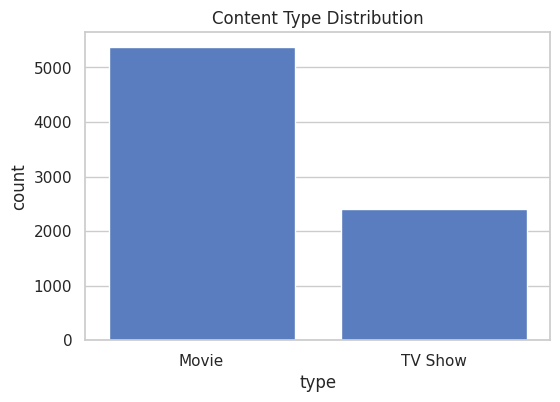

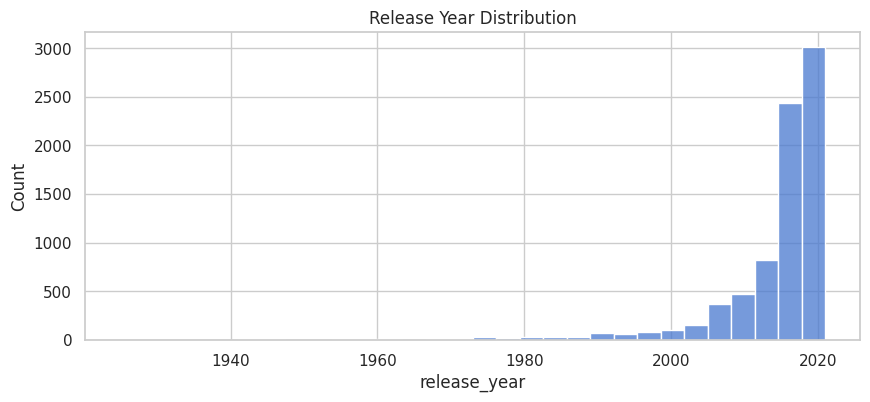

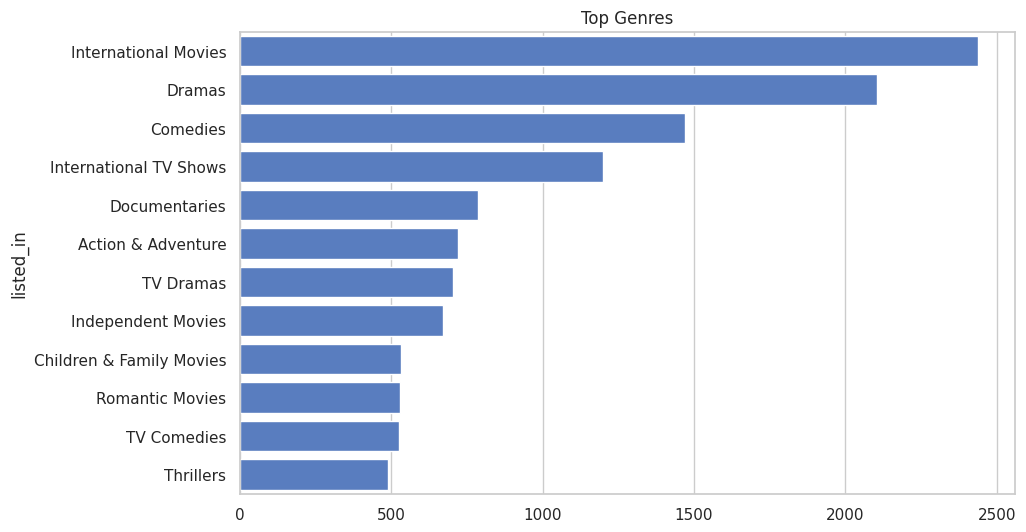

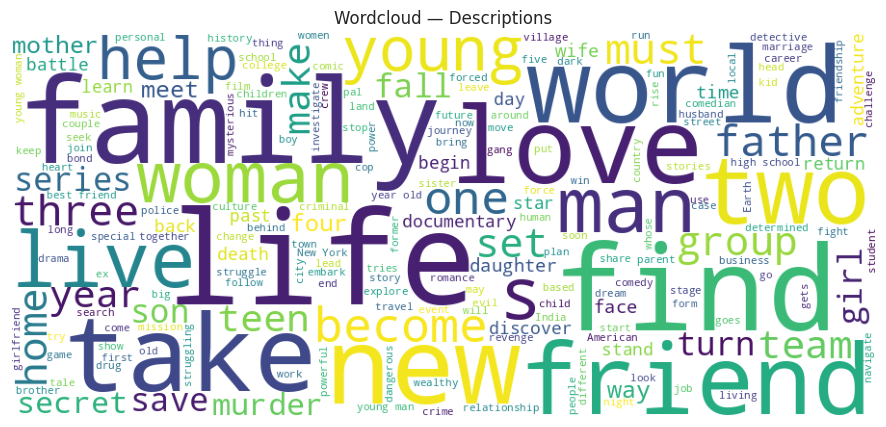

In [ ]:
# ============================
# RAW EDA VISUALS
# ============================
plt.figure(figsize=(6,4))
sns.countplot(data=df_raw, x='type', order=df_raw['type'].value_counts().index)
plt.title('Content Type Distribution'); plt.show()

plt.figure(figsize=(10,4))
sns.histplot(df_raw['release_year'].dropna(), bins=30, kde=False)
plt.title('Release Year Distribution'); plt.show()

# Top genres (explode)
plt.figure(figsize=(10,6))
top_genres = df_raw['listed_in'].dropna().str.split(',').explode().str.strip().value_counts().head(12)
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top Genres'); plt.show()

# Wordcloud (quick)
from wordcloud import WordCloud, STOPWORDS
text = " ".join(df_raw['description'].astype(str).tolist())
wc = WordCloud(width=900, height=400, background_color='white', stopwords=set(STOPWORDS)).generate(text)
plt.figure(figsize=(12,5)); plt.imshow(wc); plt.axis('off'); plt.title('Wordcloud — Descriptions'); plt.show()


In [ ]:
# ============================
# CLEANING & FEATURE ENGINEERING
# ============================
df = df_raw.copy()

# Normalize placeholder strings
placeholders = ['no data','n/a','na','unknown','none','-','not specified']
df.replace(placeholders, pd.NA, inplace=True)

# Parse dates and engineer year_added
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

# Fill text columns conservatively
for c in ['director','cast','country','rating','listed_in']:
    if c in df.columns:
        df[c] = df[c].fillna('Unknown').astype(str).str.strip()

df['description'] = df['description'].fillna('').astype(str)

# Duration numeric + type (robust)
if 'duration' not in df.columns:
    df['duration'] = ''
df['duration'] = df['duration'].astype(str)
df['duration_int'] = df['duration'].str.extract(r'(\d+)', expand=False).astype(float)
df['duration_type'] = df['duration'].str.extract(r'([A-Za-z]+)', expand=False).str.lower().fillna('')

# num_genres
df['num_genres'] = df['listed_in'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)

# release_year numeric and delay
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df['delay_years'] = df['year_added'] - df['release_year']
df['delay_years'] = df['delay_years'].where(df['delay_years'].between(0,50), np.nan)

# Fill numeric NaNs with medians later when scaling (keep NaN now)
print("Cleaned shape:", df.shape)
df.head(2)


Cleaned shape: (7787, 17)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,duration_int,duration_type,num_genres,delay_years
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,4.0,seasons,3,0.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,93.0,min,2,0.0


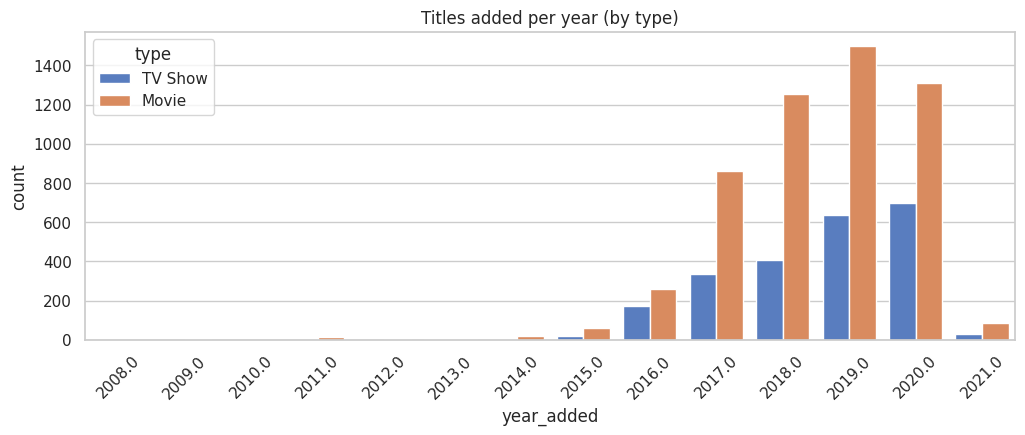

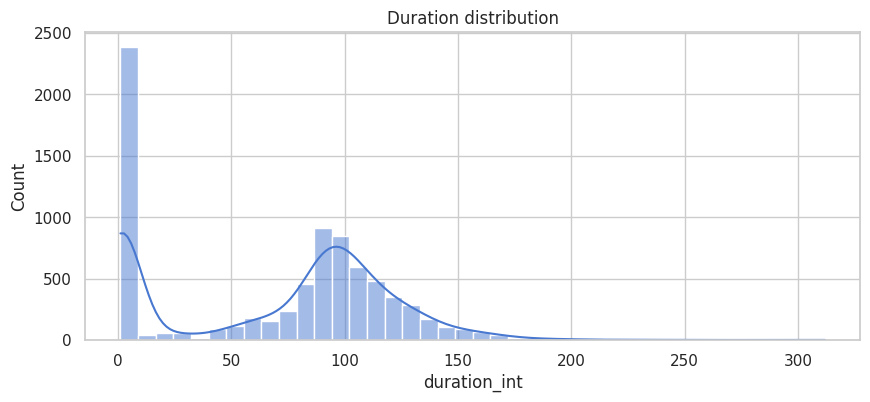

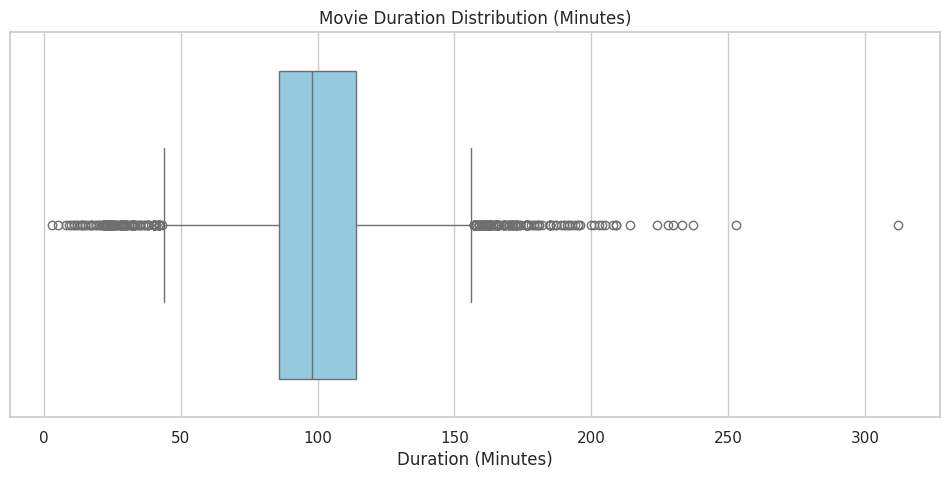

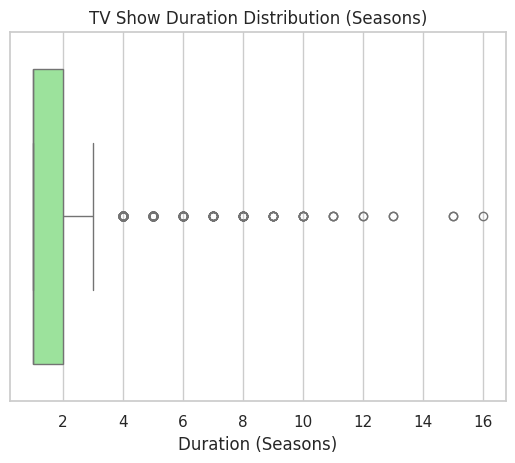

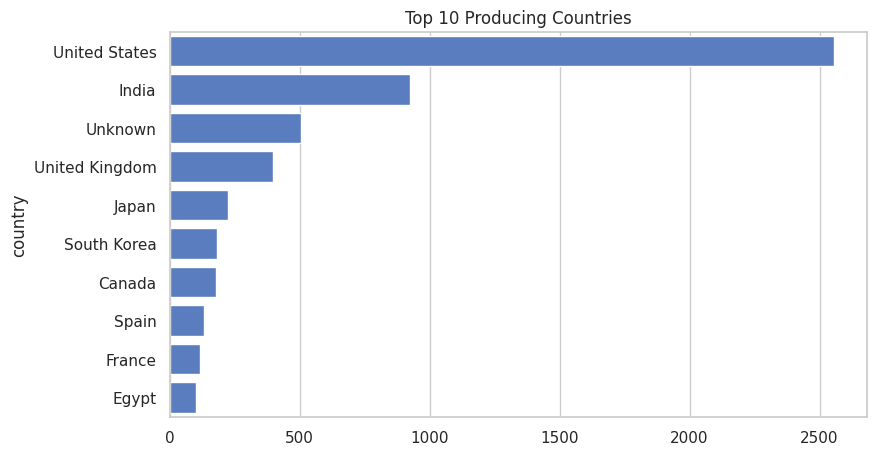

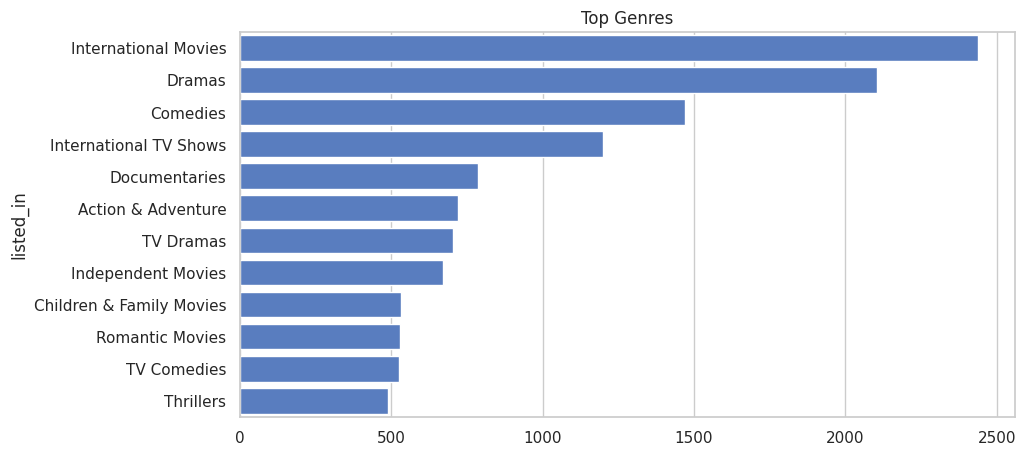

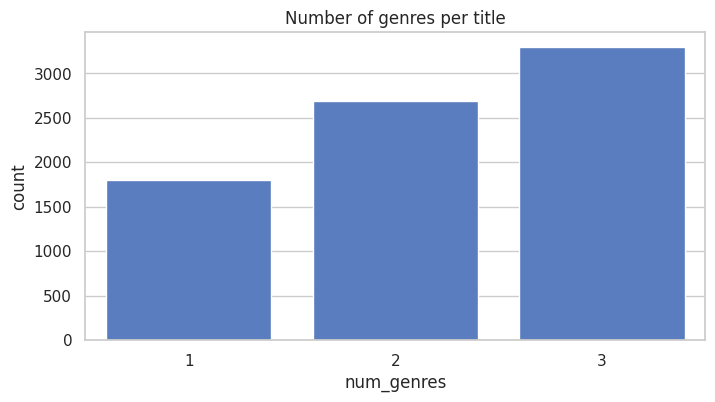

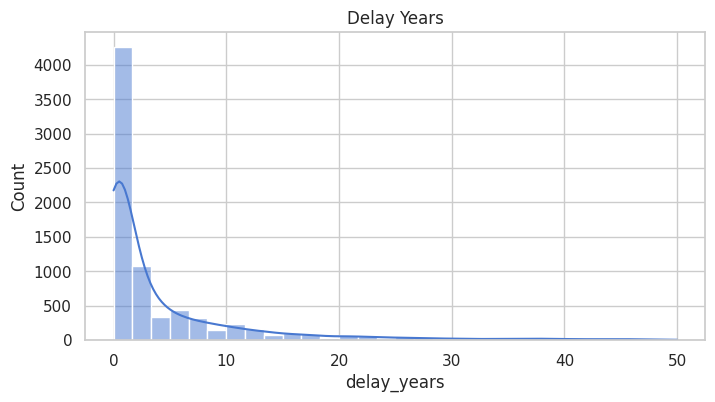

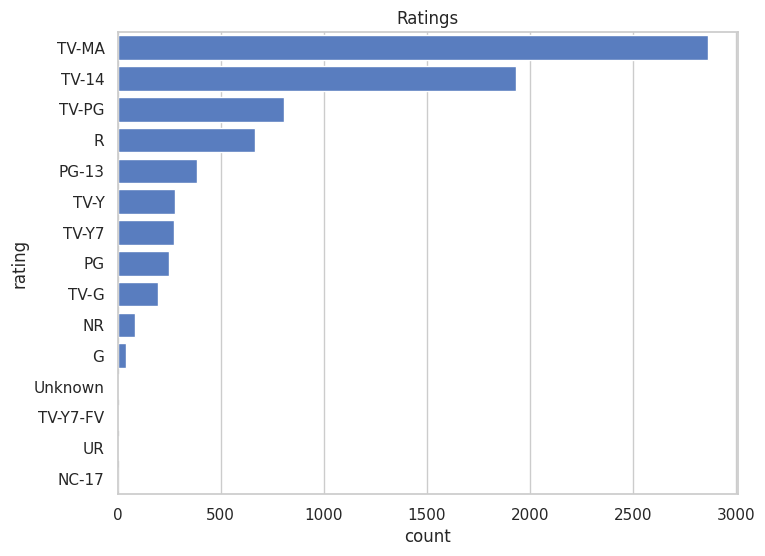

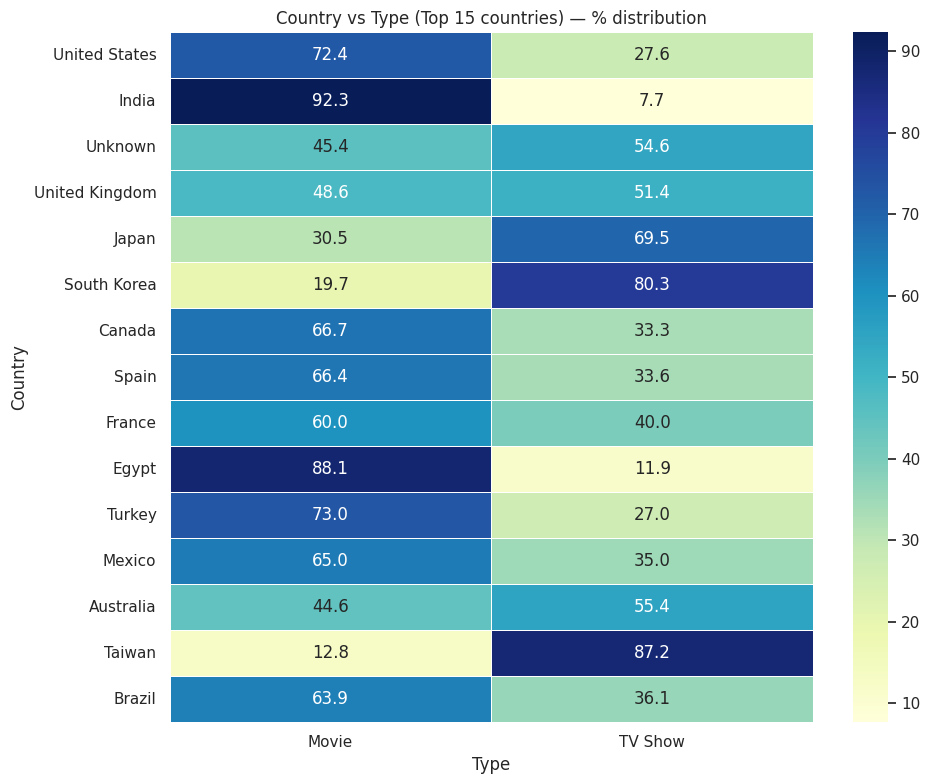

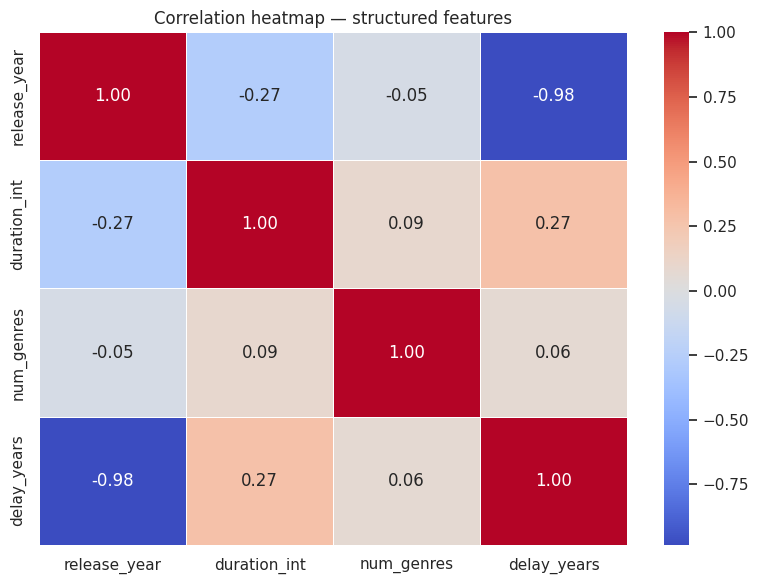

In [ ]:
# ============================
# CLEANED EDA
# ============================
# 1) Titles added per year (by type)
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='year_added', hue='type', order=sorted(df['year_added'].dropna().unique()))
plt.xticks(rotation=45); plt.title('Titles added per year (by type)'); plt.show()

# 2) Duration distribution (movies vs shows)
plt.figure(figsize=(10,4))
sns.histplot(data=df[df['duration_int'].notna()], x='duration_int', bins=40, kde=True)
plt.title('Duration distribution'); plt.show()

# 3) Boxplot duration by type
plt.figure(figsize=(12,5))

sns.boxplot(data=df[df['type']=="Movie"], x='duration_int', color="skyblue")
plt.title("Movie Duration Distribution (Minutes)")
plt.xlabel("Duration (Minutes)")
plt.show()

sns.boxplot(data=df[df['type']=="TV Show"], x='duration_int', color="lightgreen")
plt.title("TV Show Duration Distribution (Seasons)")
plt.xlabel("Duration (Seasons)")
plt.show()


# 4) Top 10 countries
plt.figure(figsize=(9,5))
top10 = df['country'].value_counts().head(10)
sns.barplot(x=top10.values, y=top10.index)
plt.title('Top 10 Producing Countries'); plt.show()

# 5) Top 12 genres
plt.figure(figsize=(10,5))
g = df['listed_in'].str.split(',').explode().str.strip().value_counts().head(12)
sns.barplot(x=g.values, y=g.index); plt.title('Top Genres'); plt.show()

# 6) Number of genres per title
plt.figure(figsize=(8,4))
sns.countplot(x='num_genres', data=df); plt.title('Number of genres per title'); plt.show()

# 7) Delay distribution
plt.figure(figsize=(8,4))
sns.histplot(df['delay_years'].dropna(), bins=30, kde=True); plt.title('Delay Years'); plt.show()

# 8) Ratings distribution
plt.figure(figsize=(8,6))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index); plt.title('Ratings'); plt.show()

# 9) country vs type heatmap
# choose top N countries by total titles
top_n = 15
country_type = pd.crosstab(df['country'], df['type'])
top_countries = country_type.sum(axis=1).sort_values(ascending=False).head(top_n).index
country_type_top = country_type.loc[top_countries]

# convert to percentage per country (rows sum to 100)
country_type_pct = country_type_top.div(country_type_top.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10,8))
sns.heatmap(country_type_pct, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.4)
plt.title(f"Country vs Type (Top {top_n} countries) — % distribution")
plt.xlabel("Type")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# 10) correlation heatmap
corr_cols = ['release_year', 'duration_int', 'num_genres', 'delay_years']

# encoding 'type','rating','country':
if 'type' in df.columns and df['type'].dtype != 'O':
    corr_cols += ['type']
if 'rating' in df.columns and df['rating'].dtype != 'O':
    corr_cols += ['rating']

# compute correlation (drop NaNs)
corr_df = df[corr_cols].apply(pd.to_numeric, errors='coerce').dropna().corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_df, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.4, square=False)
plt.title("Correlation heatmap — structured features")
plt.tight_layout()
plt.show()

In [ ]:
# ============================
# TEXT PREPROCESSING
# ============================
# conservative cleaning + lemmatization
stop_words = set(stopwords.words('english'))
lemm = WordNetLemmatizer()

def clean_and_lemmatize(text):
    if pd.isna(text) or text=='':
        return ''
    text = contractions.fix(str(text))
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\w*\d\w*', '', text)
    tokens = word_tokenize(text)
    tokens = [lemm.lemmatize(t) for t in tokens if t not in stop_words and len(t)>1]
    return ' '.join(tokens)

# apply
df['clean_description'] = df['description'].apply(clean_and_lemmatize)
print("Sample cleaned description:", df['clean_description'].iloc[0][:200])


Sample cleaned description: future elite inhabit island paradise far crowded slum get one chance join saved squalor


TF-IDF shape: (7787, 5000)
SVD output shape: (7787, 50)


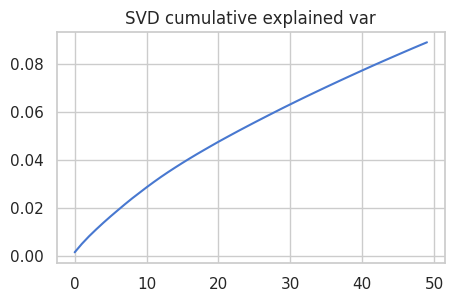

In [ ]:
# ============================
# TF-IDF + TruncatedSVD
# ============================
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2), min_df=2)
tfidf_matrix = vectorizer.fit_transform(df['clean_description'])   # sparse
print("TF-IDF shape:", tfidf_matrix.shape)

# TruncatedSVD
svd = TruncatedSVD(n_components=50, random_state=42)
X_svd = svd.fit_transform(tfidf_matrix)
print("SVD output shape:", X_svd.shape)

# # optional: explained variance (approx)
# explained = svd.explained_variance_ratio_.cumsum()
# plt.figure(figsize=(5,3)); plt.plot(explained); plt.title('SVD cumulative explained var'); plt.show()


In [ ]:
# ============================
# STRUCTURED FEATURES + COMBINE
# ============================
num_cols = ['release_year','duration_int','num_genres','delay_years']
# create X_struct filled with medians
X_struct = df[num_cols].copy()
for c in num_cols:
    X_struct[c] = pd.to_numeric(X_struct[c], errors='coerce')
    X_struct[c].fillna(X_struct[c].median(), inplace=True)

scaler = StandardScaler()
X_struct_scaled = scaler.fit_transform(X_struct)

# Combine text + structured
X = np.hstack([X_svd, X_struct_scaled])
print("Combined X shape:", X.shape)


Combined X shape: (7787, 54)


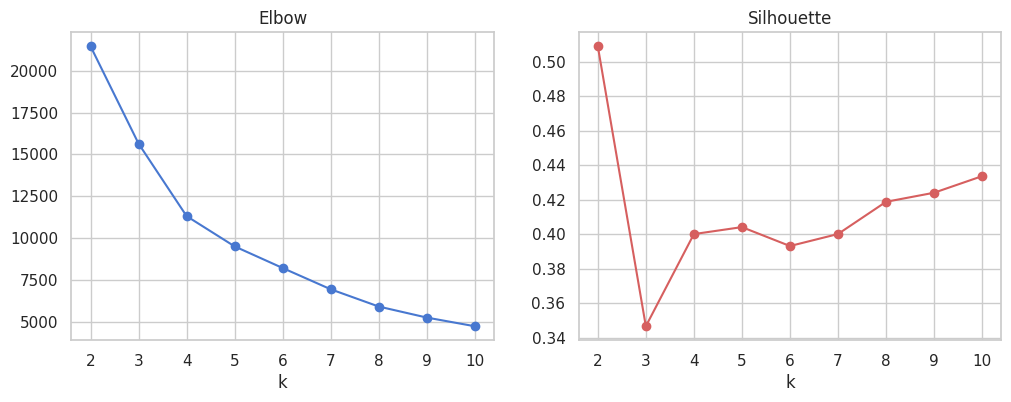

KMeans counts:
 km_cluster
0    3506
3    1989
1    1682
2     610
Name: count, dtype: int64
KMeans silhouette (k_opt): 0.40014030319958144


In [ ]:
# ============================
# KMEANS: Elbow, Silhouette, Fit
# ============================
from sklearn.cluster import KMeans
Ks = list(range(2,11))
inertia = []; sils = []
for k in Ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    lbl = km.fit_predict(X)
    inertia.append(km.inertia_)
    sils.append(silhouette_score(X, lbl))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1); plt.plot(Ks, inertia, 'bo-'); plt.title('Elbow'); plt.xlabel('k')
plt.subplot(1,2,2); plt.plot(Ks, sils, 'ro-'); plt.title('Silhouette'); plt.xlabel('k')
plt.show()

# choose k
k_opt = 4
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=20)
df['km_cluster'] = kmeans.fit_predict(X)
print("KMeans counts:\n", df['km_cluster'].value_counts())
print("KMeans silhouette (k_opt):", silhouette_score(X, df['km_cluster']))


In [ ]:
# ============================
# HIERARCHICAL (Agglomerative)
# ============================
agg = AgglomerativeClustering(n_clusters=k_opt, linkage='ward')
df['hier_cluster'] = agg.fit_predict(X)
print("Hier counts:\n", df['hier_cluster'].value_counts())

# cross-tab
print("\nKMeans vs Hierarchical cross-tab:")
display(pd.crosstab(df['km_cluster'], df['hier_cluster']))

# silhouette hierarchical
print("Hier silhouette:", silhouette_score(X, df['hier_cluster']))


Hier counts:
 hier_cluster
2    2857
0    2494
3    1906
1     530
Name: count, dtype: int64

KMeans vs Hierarchical cross-tab:


hier_cluster,0,1,2,3
km_cluster,,,,
0,0,24,1671,1811
1,556,5,1121,0
2,24,500,5,81
3,1914,1,60,14


Hier silhouette: 0.3525411918170242


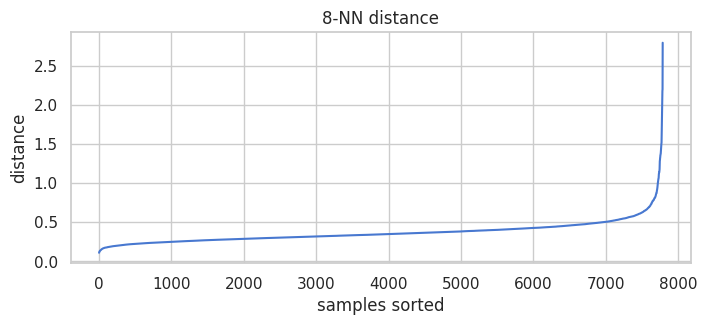

DBSCAN cluster counts (noise = -1):
 db_cluster
0    7787
Name: count, dtype: int64
DBSCAN silhouette: insufficient labeled points (or single cluster)


In [ ]:
# ============================
# DBSCAN (tune eps + fit)
# ============================
# k-distance plot (k = min_samples)
min_samples = 8
nbrs = NearestNeighbors(n_neighbors=min_samples).fit(X)
distances, _ = nbrs.kneighbors(X)
distances = np.sort(distances[:, min_samples-1])

plt.figure(figsize=(8,3)); plt.plot(distances); plt.title(f'{min_samples}-NN distance'); plt.xlabel('samples sorted'); plt.ylabel('distance'); plt.show()

# pick eps visually (try 3.0 as a starting point; tune if needed)
eps = 3.0
db = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
df['db_cluster'] = db.fit_predict(X)
print("DBSCAN cluster counts (noise = -1):\n", df['db_cluster'].value_counts())

# compute silhouette for DBSCAN excluding noise
mask = df['db_cluster'] != -1
if mask.sum() > 1 and len(df.loc[mask,'db_cluster'].unique()) > 1:
    print("DBSCAN silhouette (excl noise):", silhouette_score(X[mask], df.loc[mask,'db_cluster']))
else:
    print("DBSCAN silhouette: insufficient labeled points (or single cluster)")


In [ ]:
# ============================
# COMPARISON + INTERPRETATION
# ============================
# metrics
results = {}
# kmeans
labels_km = df['km_cluster'].values
results['kmeans'] = {
    'silhouette': silhouette_score(X, labels_km),
    'calinski': calinski_harabasz_score(X, labels_km),
    'davies': davies_bouldin_score(X, labels_km)
}
# hierarchical
labels_h = df['hier_cluster'].values
results['hierarchical'] = {
    'silhouette': silhouette_score(X, labels_h),
    'calinski': calinski_harabasz_score(X, labels_h),
    'davies': davies_bouldin_score(X, labels_h)
}
# dbscan (exclude noise)
mask = df['db_cluster'] != -1
if mask.sum() > 1 and len(df.loc[mask,'db_cluster'].unique())>1:
    labels_db = df.loc[mask,'db_cluster'].values
    results['dbscan'] = {
        'silhouette': silhouette_score(X[mask], labels_db),
        'calinski': calinski_harabasz_score(X[mask], labels_db),
        'davies': davies_bouldin_score(X[mask], labels_db)
    }
else:
    results['dbscan'] = {'silhouette': np.nan, 'calinski': np.nan, 'davies': np.nan}

import pprint; pprint.pprint(results)

# Top TF-IDF terms per KMeans cluster (sparse mean)
terms = vectorizer.get_feature_names_out()
for c in sorted(df['km_cluster'].unique()):
    idx = np.where(df['km_cluster']==c)[0]
    mean_vec = tfidf_matrix[idx].mean(axis=0)
    mean_vec = np.asarray(mean_vec).ravel()
    top_idx = mean_vec.argsort()[::-1][:12]
    print(f"\nKMeans Cluster {c} top terms:", ", ".join(terms[top_idx][:10]))

# Numeric summary per cluster
num_cols = ['release_year','duration_int','num_genres','delay_years']
print("\nNumeric summary by KMeans cluster:")
display(df.groupby('km_cluster')[num_cols].mean().round(2))

# Example titles per cluster
for c in sorted(df['km_cluster'].unique()):
    print(f"\nCluster {c} sample titles:")
    display(df.loc[df['km_cluster']==c, ['title','release_year','duration_int','listed_in']].head(6))


{'dbscan': {'calinski': nan, 'davies': nan, 'silhouette': nan},
 'hierarchical': {'calinski': np.float64(4020.95197367683),
                  'davies': np.float64(0.9905988640095446),
                  'silhouette': np.float64(0.3525411918170242)},
 'kmeans': {'calinski': np.float64(4710.378465746439),
            'davies': np.float64(0.8837946034201836),
            'silhouette': np.float64(0.40014030319958144)}}

KMeans Cluster 0 top terms: life, young, man, woman, family, love, new, friend, father, world

KMeans Cluster 1 top terms: life, special, standup, friend, new, documentary, comedian, family, world, comic

KMeans Cluster 2 top terms: life, young, family, love, woman, man, fall, friend, new, father

KMeans Cluster 3 top terms: series, life, world, family, love, woman, new, young, friend, school

Numeric summary by KMeans cluster:


,release_year,duration_int,num_genres,delay_years
km_cluster,,,,
0,2015.35,105.93,2.52,3.18
1,2016.38,56.63,1.00,1.92
2,1989.77,106.52,2.26,25.94
3,2016.77,3.33,2.61,1.68



Cluster 0 sample titles:


,title,release_year,duration_int,listed_in
1,7:19,2016,93.0,"Dramas, International Movies"
2,23:59,2011,78.0,"Horror Movies, International Movies"
3,9,2009,80.0,"Action & Adventure, Independent Movies, Sci-Fi..."
6,122,2019,95.0,"Horror Movies, International Movies"
8,706,2019,118.0,"Horror Movies, International Movies"
9,1920,2008,143.0,"Horror Movies, International Movies, Thrillers"



Cluster 1 sample titles:


,title,release_year,duration_int,listed_in
4,21,2008,123.0,Dramas
19,'89,2017,87.0,Sports Movies
25,(T)ERROR,2015,84.0,Documentaries
26,(Un)Well,2020,1.0,Reality TV
29,#blackAF,2020,1.0,TV Comedies
33,#realityhigh,2017,99.0,Comedies



Cluster 2 sample titles:


,title,release_year,duration_int,listed_in
7,187,1997,119.0,Dramas
94,28 Days,2000,104.0,"Comedies, Dramas"
97,3 Deewarein,2003,121.0,"Dramas, International Movies, Thrillers"
105,300 Miles to Heaven,1989,93.0,"Dramas, International Movies"
121,50 First Dates,2004,99.0,"Comedies, Romantic Movies"
153,A Bridge Too Far,1977,176.0,"Action & Adventure, Classic Movies, Dramas"



Cluster 3 sample titles:


,title,release_year,duration_int,listed_in
0,3%,2020,4.0,"International TV Shows, TV Dramas, TV Sci-Fi &..."
5,46,2016,1.0,"International TV Shows, TV Dramas, TV Mysteries"
11,1983,2018,1.0,"Crime TV Shows, International TV Shows, TV Dramas"
12,1994,2019,1.0,"Crime TV Shows, Docuseries, International TV S..."
16,Feb-09,2018,1.0,"International TV Shows, TV Dramas"
24,​SAINT SEIYA: Knights of the Zodiac,2020,2.0,"Anime Series, International TV Shows"


Cluster 0 — Modern Feature-Length Dramas / Movies

long durations (avg 106 min)

recent release years (2015+)

genres: drama, thriller, horror

top terms: life, woman, family, man

Cluster 1 — Short Format: Stand-up, Reality, Docu-series

durations ~1 episode / 50–60 min

genres: documentary, standup, comedies

top terms: standup, special, documentary

Cluster 2 — Older Classic Movies

release years around 1980–2005

longest delay (avg 26 years)

includes war films, old dramas

top terms: family, love, man, woman

Cluster 3 — TV Shows (1–4 seasons)

duration_int = seasons (1–4)

genres: crime series, international TV, anime, sci-fi

top terms: series, world, friend, school


**Hierarchical Clusters**

Cluster interpretations:

Cluster 0: modern web shows, shorter durations

Cluster 1: older classical movies

Cluster 2: mainstream dramas & comedies

Cluster 3: crime, thrillers, suspense, TV dramas

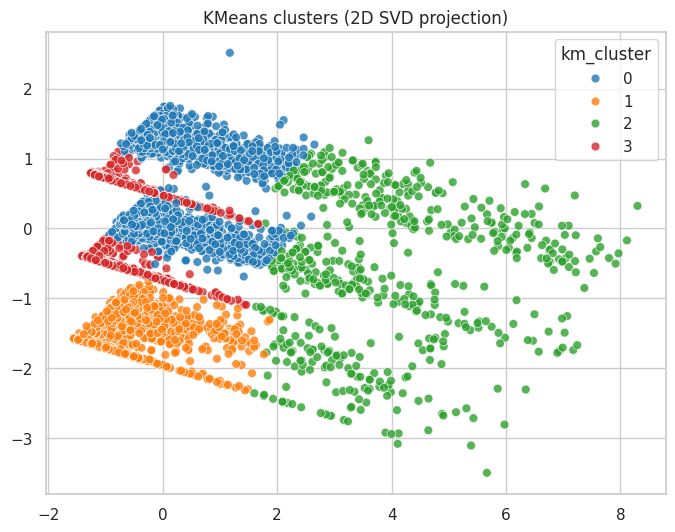

In [ ]:
# ============================
#2D VISUALIZATION (SVD on X) & SAVE
# ============================
# 2D projection for visualization: SVD on combined feature X
svd_viz = TruncatedSVD(n_components=2, random_state=42)
X_vis = svd_viz.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_vis[:,0], y=X_vis[:,1], hue=df['km_cluster'], palette='tab10', s=40, alpha=0.8)
plt.title('KMeans clusters (2D SVD projection)'); plt.show()



Running t-SNE... this may take 1–3 minutes.


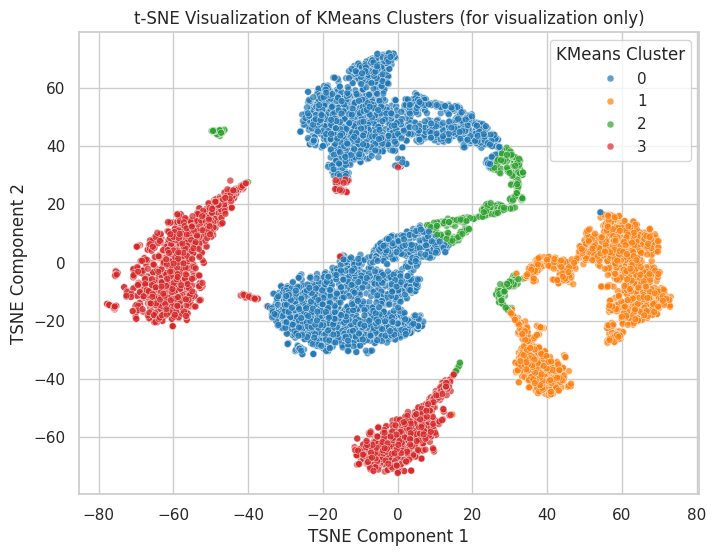

In [ ]:
# ---------------------------------------------
# 15B. t-SNE Visualization (Optional but good for interview)
# ---------------------------------------------
from sklearn.manifold import TSNE

print("Running t-SNE... this may take 1–3 minutes.")

tsne = TSNE(
    n_components=2,
    perplexity=40,          # good for 5k–10k samples
    learning_rate=200,
    n_iter=1000,
    random_state=42,
    init='random'
)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_tsne[:,0],
    y=X_tsne[:,1],
    hue=df['km_cluster'],    # FIXED COLUMN NAME
    palette='tab10',
    s=25,
    alpha=0.7
)
plt.title("t-SNE Visualization of KMeans Clusters (for visualization only)")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.legend(title="KMeans Cluster")
plt.show()
